In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

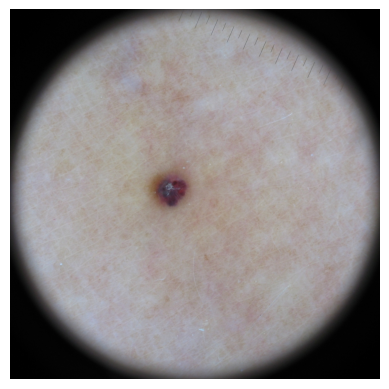

In [110]:
def display_img(image, gray=False):
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')

def crop_frame(image, threshold = 0.2, debug=False):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
        
    # Gaussian blur and binarize
    blurred = cv2.GaussianBlur(gray, (0, 0), 2)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find connected components and their properties
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Cropping flag for identifying cropped images
    CROP_FLAG = False

    if contours:        
        # Calculate the center and diameter of the largest component
        largest_contour = max(contours, key=cv2.contourArea)

        # finds a circle of the minimum area enclosing an area
        (x , y), radius = cv2.minEnclosingCircle(largest_contour) # returns the center and radius

        # casting from float to int for precision, necessary for visualizing 
        center = (int(x), int(y)) #(x, y)
        radius = int(radius)

        if debug:
            # for debugging we can visualize the contour of the minimum enclosing circle using its radius
            print(center, radius)
            cv2.circle(image, center, 5, (255, 0, 0), -1)   # viz the center as a dot (small radius)
            cv2.circle(image, center, radius, (255,0,0), 3) # viz the center as a crcle
        
        # Define the cropping box
        x_min = int(center[0] - radius)
        x_max = int(center[0] + radius)
        y_min = int(center[1] - radius)
        y_max = int(center[1] + radius)

        # check if we need to crop the images based on their intensities mean
        cropped_image = image.copy()[y_min:y_max, x_min:x_max]

        # Calculate mean values inside and outside the cropping box
        mean_inside = np.mean(cropped_image)

        # Calculate mean values outside the cropping box
        mean_above = np.mean(image[:y_min, :])
        mean_below = np.mean(image[y_max:, :])
        mean_left = np.mean(image[y_min:y_max, :x_min])
        mean_right = np.mean(image[y_min:y_max, x_max:])

        # Calculate mean_outside as the average of the four regions
        mean_outside = (mean_above + mean_below + mean_left + mean_right) / 4

        if mean_outside / mean_inside < threshold:
            # print("Required cropping")
            ret = cropped_image
            CROP_FLAG = True
        else: 
            # print("Doesn't required cropping")
            ret = image
    else:
        # print("No contours found, doesn't required cropping")
        ret = image

    return ret, CROP_FLAG

# mel00759
# nev00002
img_name = 'vac00135.jpg'

img_dir  = os.path.join(os.getcwd(), '../challenge1/train/others', img_name)
image = cv2.imread(img_dir,cv2.IMREAD_COLOR)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


img, _ = crop_frame(image)    
display_img(img)


In [60]:
# Testing 
# --------------------------------------

nevus_dir = os.path.join(os.getcwd(), '../challenge1/train/nevus')
others_dir = os.path.join(os.getcwd(), '../challenge1/train/others')

directory = os.fsencode(nevus_dir)

counter = 0
    
for file in tqdm(os.listdir(directory)):
     filename = os.fsdecode(file)
     if filename.endswith(".jpg"): 
      #   print(filename)

      img_dir  = os.path.join(os.getcwd(), '../challenge1/train/nevus', filename)

      image = cv2.imread(img_dir,cv2.IMREAD_COLOR)

      image, flag = crop_frame(image, threshold = 0.2)

      if flag:
         counter = counter + 1
     else:
         continue
     
print(f"Nevus class: {counter}")

# --------------------------------------

directory = os.fsencode(others_dir)

counter = 0

for file in tqdm(os.listdir(directory)):
     filename = os.fsdecode(file)
     if filename.endswith(".jpg"): 
      #   print(filename)

      img_dir  = os.path.join(os.getcwd(), '../challenge1/train/others', filename)

      image = cv2.imread(img_dir,cv2.IMREAD_COLOR)

      image, flag = crop_frame(image, threshold = 0.2)

      if flag:
         counter = counter + 1
     else:
         continue
     
print(f"Others class: {counter}")

 66%|██████▌   | 5092/7725 [01:30<00:46, 57.15it/s]C:\Users\abdal\AppData\Local\Temp\ipykernel_17872\540394592.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  if mean_outside / mean_inside < threshold:
100%|██████████| 7725/7725 [02:15<00:00, 56.92it/s]


Nevus class: 369


100%|██████████| 7470/7470 [03:18<00:00, 37.55it/s]

Others class: 1280


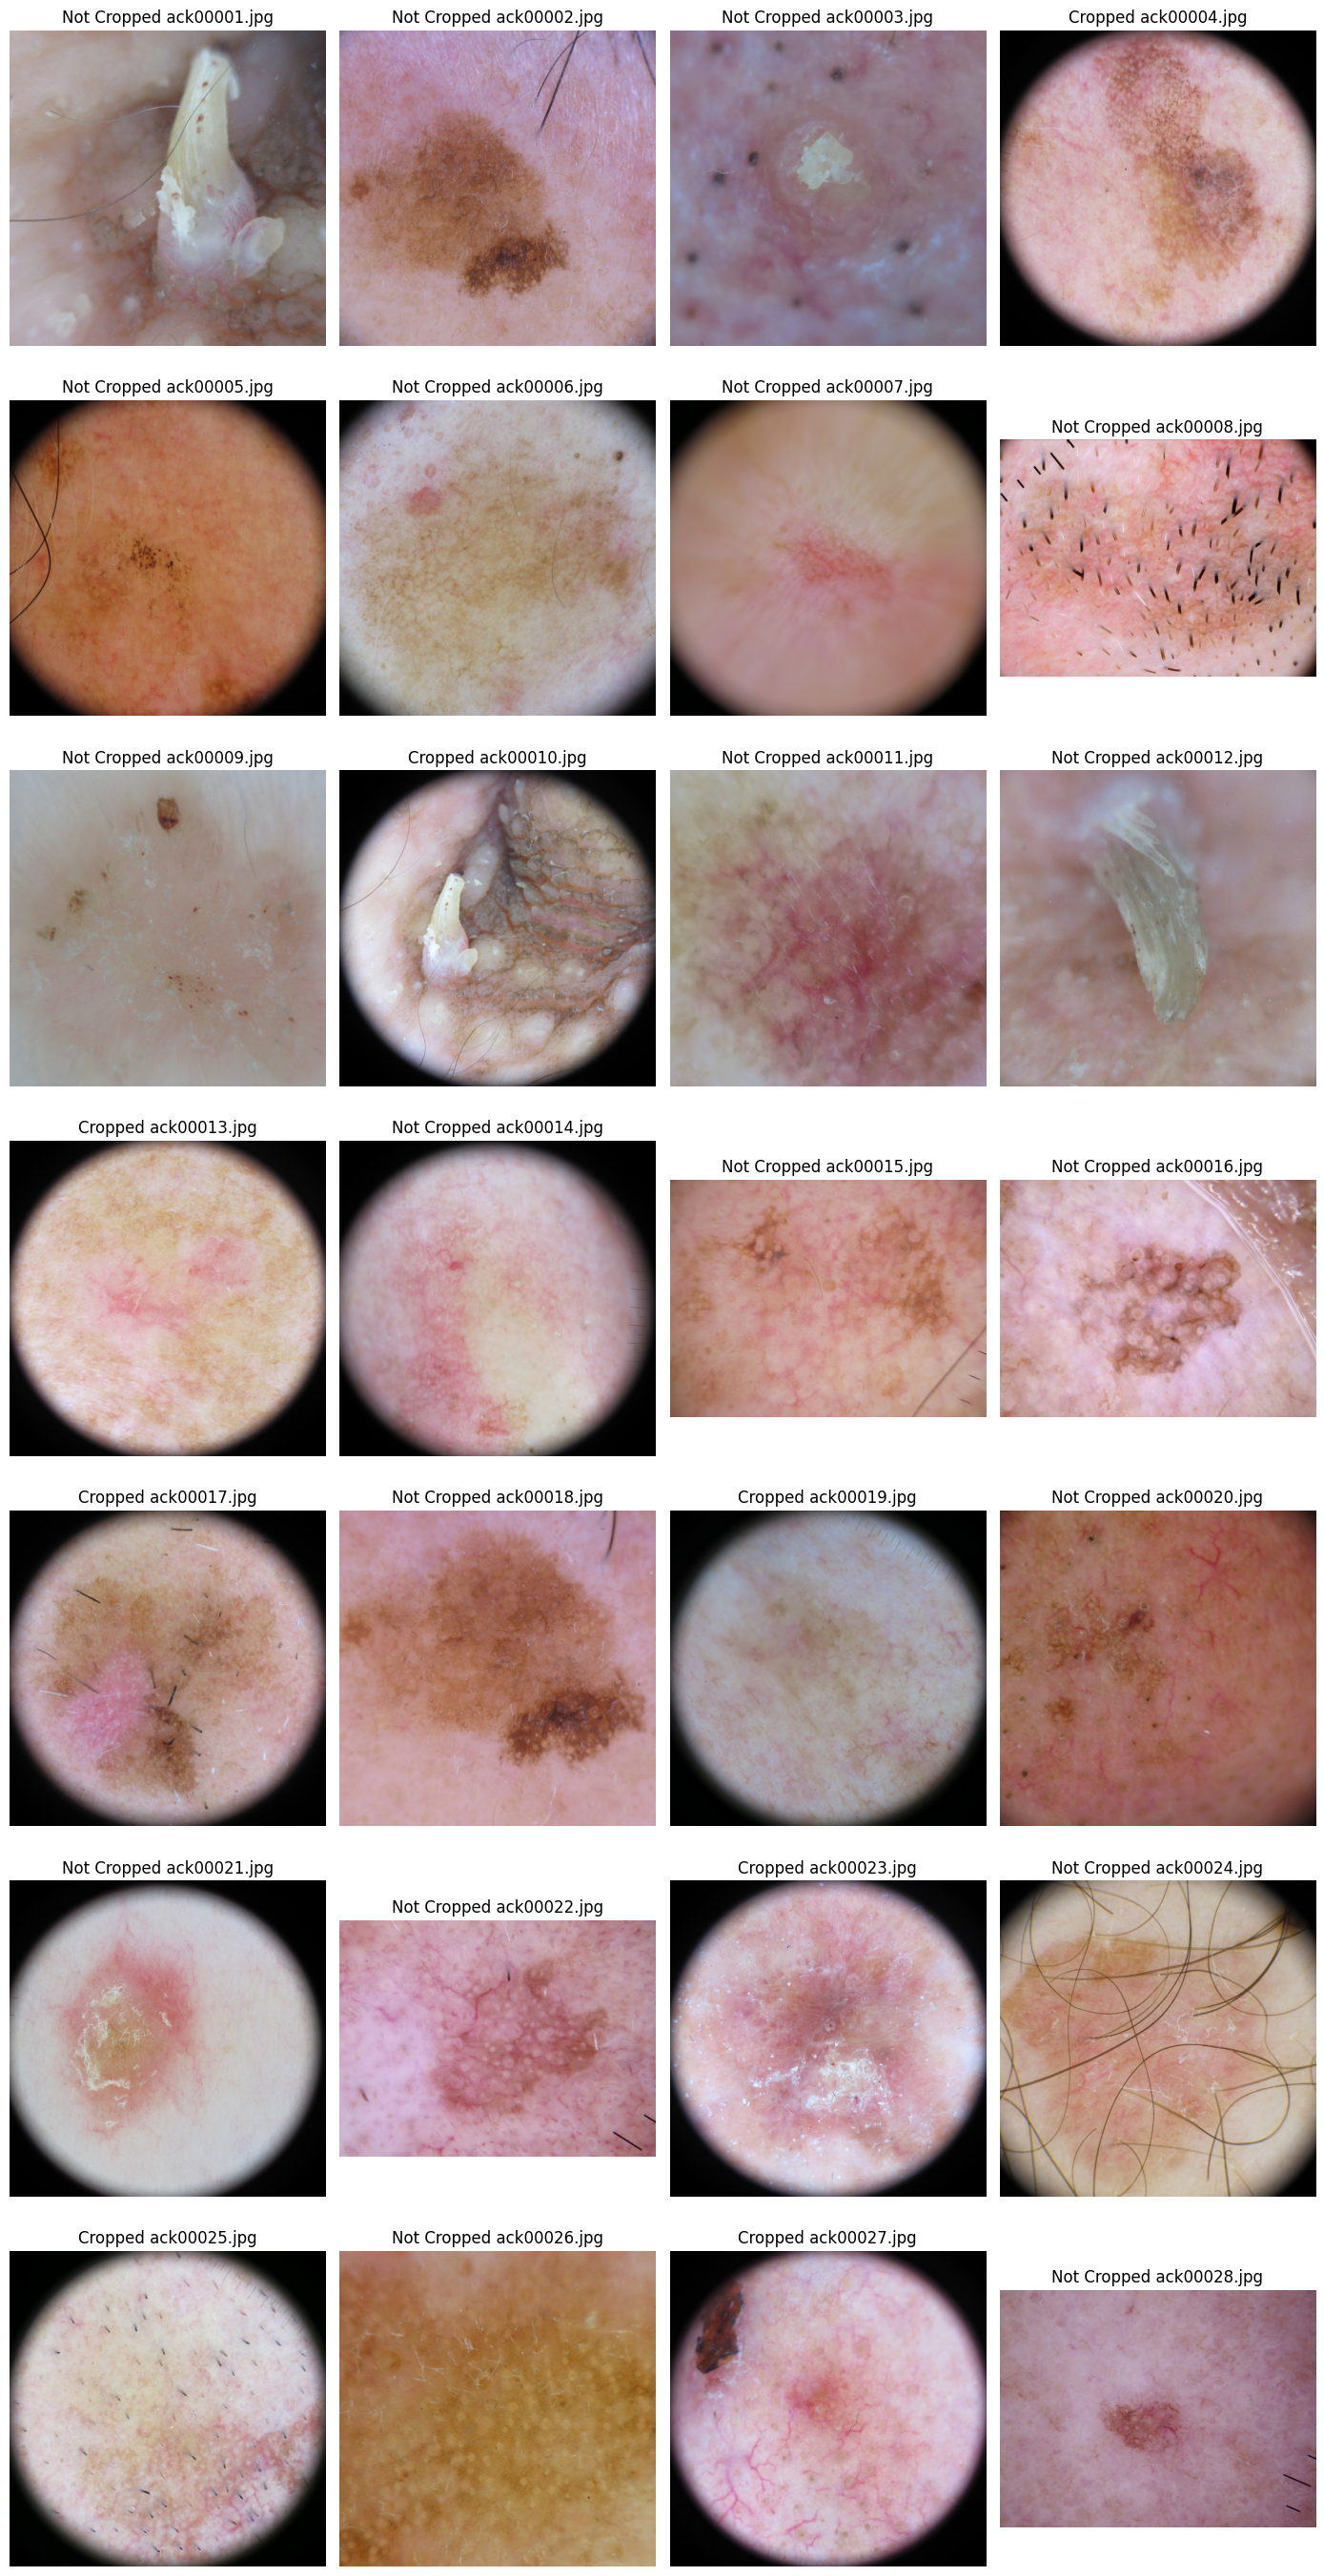

In [112]:
others_dir = os.path.join(os.getcwd(), '../challenge1/train/others')
directory = os.fsencode(others_dir)

plt.figure(figsize=(14, 28))
for i in range(28):
    plt.subplot(7, 4, i + 1)
    img_name = os.listdir(directory)[i]
    img_dir  = os.path.join(os.getcwd(), '../challenge1/train/others', img_name.decode('ascii'))
    img = cv2.imread(img_dir, cv2.IMREAD_COLOR)
    img, is_cropped = crop_frame(img, threshold = 0.2)

    plt.title(("Cropped" if is_cropped else "Not Cropped") + f" {img_name.decode('ascii')}")
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()